<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [1]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras] --ignore-installed llvmlite
!pip install pmdarima
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.17.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached sktime-0.11.2-py3-none-any.whl (6.6 MB)
  Using cached llvmlite-0.38.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached numba-0.55.1-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached tensorflow_probability-0.16.0-py2.py3-none-any.whl (6.3 MB)
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached tensorflow

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbit-ml 1.1.1 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.17.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



### Источники временных рядов

Для этой домашки я взяла данные из списка популярных временных рядов: https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc. 

Ряд с дневной частотой - **U.S. nuclear capacity, daily** (Megawatts) (гитхаб: https://github.com/rishabh89007/Time_Series_Datasets/blob/main/Nuclear%20Capacity.csv). Данные показывают ежедневную (максимальную?) мощность атомной элеткроэнерегетики США в мегаваттах с начала 2007 года по 21 апреля 2021 года.

Ряд с месячной частотой - **Cushing, OK WTI Spot Price FOB, Monthly (Dollars per Barrel)** (гитхаб: https://github.com/rishabh89007/Time_Series_Datasets/blob/main/WTI%20Price%20FOB.csv). Какие-то цены на нефть с начала 1986 года по март 2021 года.


Оба датасета потребовали базовой предобработки: приведения даты и названий колонок в нужный/удобный формат. В остальном ряды уже готовые для анализа.

В ячейке ниже ссылки для скачивания данных, так что просто запуска тетрадки должно быть достаточно



In [3]:
# скачаем данные
!wget https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capacity.csv #daily
!wget https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/WTI%20Price%20FOB.csv  #monthly

--2022-04-24 20:44:19--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Nuclear%20Capacity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118438 (116K) [text/plain]
Saving to: ‘Nuclear Capacity.csv.9’

Nuclear Capacity.cs 100%[===================>] 115.66K  --.-KB/s    in 0.02s   

2022-04-24 20:44:19 (5.47 MB/s) - ‘Nuclear Capacity.csv.9’ saved [118438/118438]

--2022-04-24 20:44:19--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/WTI%20Price%20FOB.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [4]:
# считаем файлы

ts_day = pd.read_csv('Nuclear Capacity.csv')
ts_month = pd.read_csv('WTI Price FOB.csv')

In [5]:
ts_day.head()

,Unnamed: 0,"U.S. nuclear capacity, daily (Megawatts)"
0,2007 0101 01,101764.9
1,2007 0102 02,101764.9
2,2007 0103 03,101764.9
3,2007 0104 04,101764.9
4,2007 0105 05,101764.9


In [6]:
ts_month.head()

,Unnamed: 0,"Cushing, OK WTI Spot Price FOB, Monthly (Dollars per Barrel)"
0,1986 01,22.93
1,1986 02,15.46
2,1986 03,12.61
3,1986 04,12.84
4,1986 05,15.38


Как видно, даты в датасетах представлены в строковом формате, который нужно унифицировать и преобразовать в объект datetime. Также я унифицирую названия колонок, чтобы дальше удобно было с ними работать.

In [7]:
# Базовая предобработка -- удобные названия колонок и преобразование в формат datetime

ts_day.columns = ['time', 'value0']
ts_month.columns = ['time', 'value0']

ts_day['time'] = ts_day['time'].str[:-3]
ts_day['time'] = ts_day['time'].str.replace(' ', '')
ts_day['time'] = pd.to_datetime(ts_day['time'])

ts_month['time'] = pd.to_datetime(ts_month['time'])


После предобработки вот так:

In [8]:
ts_day.head()

,time,value0
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [9]:
ts_month.head()

,time,value0
0,1986-01-01,22.93
1,1986-02-01,15.46
2,1986-03-01,12.61
3,1986-04-01,12.84
4,1986-05-01,15.38


In [10]:
# сделаем разбиение на train/test

In [11]:
# Для daily данных возьму в трейн все до 2017 года включительно (остаются полные 2018, 2019 и 2020)

trainsizeday=11*365+3     
train_day = ts_day[:trainsizeday]
test_day = ts_day[trainsizeday:]

print('Доля тестовой выборки в данных (Nuclear Capacity, daily):', 
      '{0:.3f}'.format(test_day.shape[0]/(ts_day.shape[0])))

Доля тестовой выборки в данных (Nuclear Capacity, daily): 0.231


In [12]:
test_day.head(3)

,time,value0
4018,2018-01-01,102016.8
4019,2018-01-02,102016.8
4020,2018-01-03,102016.8


In [13]:
# Для monthly данных возьму в трейн первые 30 лет 

trainsizemonth = 30*12
train_month = ts_month[:trainsizemonth]
test_month = ts_month[trainsizemonth:]

print('Доля тестовой выборки в данных (WTI Price FOB, monthly):', 
      '{0:.3f}'.format(test_month.shape[0]/(ts_month.shape[0])))

Доля тестовой выборки в данных (WTI Price FOB, monthly): 0.149


In [14]:
test_month.head(3)

,time,value0
360,2016-01-01,31.68
361,2016-02-01,30.32
362,2016-03-01,37.55


В тестовую выборку для данных с месячной частотой попало меньше 20% всех лет, но дальше на отрисовке будет видно, почему лучше взять тест с 2016 года (если коротко, значения сильно падают).

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

In [15]:
# отрисуем временные ряды

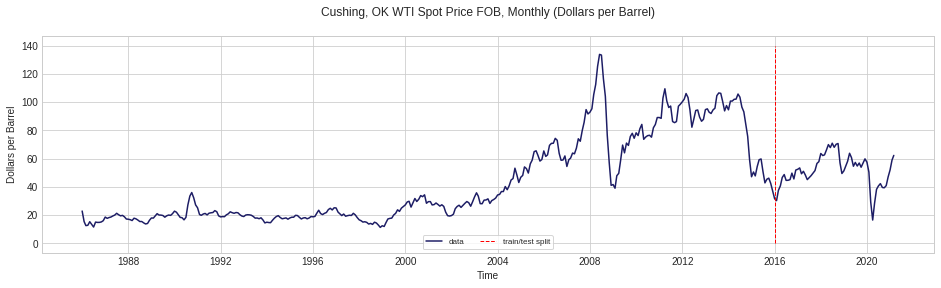

In [16]:
line = pd.DataFrame(data={'x': ['2016-01-01', '2016-01-01']})
line.x = pd.to_datetime(line.x)

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(16, 4))
plt.plot(ts_month['time'], ts_month['value0'].values, '#1D1D65', label='data')
plt.plot(line, (0, 140), 'red', linestyle='--', linewidth=1, label='train/test split')
plt.xlabel('Time')
plt.ylabel('Dollars per Barrel')
plt.title('Cushing, OK WTI Spot Price FOB, Monthly (Dollars per Barrel)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.show()

Вот, если делать разделение по 2014 году (идеальное 80/20), то модели просто предсказывают дальнейший рост как лохушки

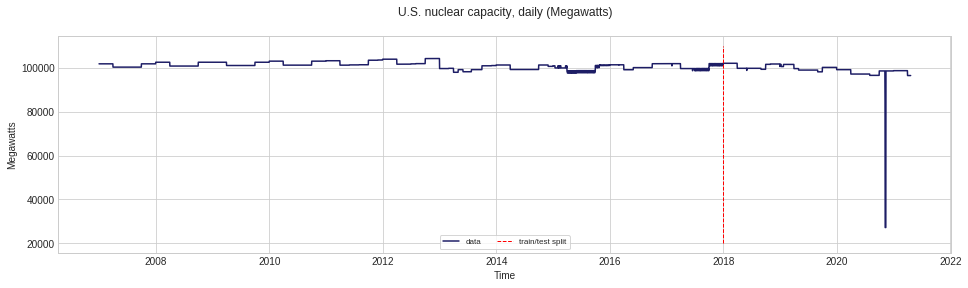

In [17]:
line = pd.DataFrame(data={'x': ['2018-01-01', '2018-01-01']})
line.x = pd.to_datetime(line.x)

plt.figure(figsize=(16, 4))
plt.plot(ts_day['time'], ts_day['value0'].values, '#1D1D65', label='data')
plt.plot(line, (20000, 110000), 'red', linestyle='--', linewidth=1, label='train/test split')
plt.xlabel('Time')
plt.ylabel('Megawatts')
plt.title('U.S. nuclear capacity, daily (Megawatts)\n')
plt.legend(prop={'size': 8}, frameon=True, loc='lower center', ncol=2)
plt.show()

Выброс некрасивый, возьму логарифмы от значений в обоих датасетах. Дальше по сезонности иллюстрация будет по изначальным значениям, а в остальном - логарифмы.

In [18]:
train_month['value'] = np.log2(train_month.value0)
test_month['value'] = np.log2(test_month.value0)

train_day['value'] = np.log2(train_day.value0)
test_day['value'] = np.log2(test_day.value0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [19]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')

In [20]:
def autocorr(x):
  x = x - x.mean()
  result = np.correlate(x, x, mode='full')
  return result[int(result.size/2):] / (x.var() * x.shape[0])

У меня не получились красивые барплоты, но линия вроде тоже ок

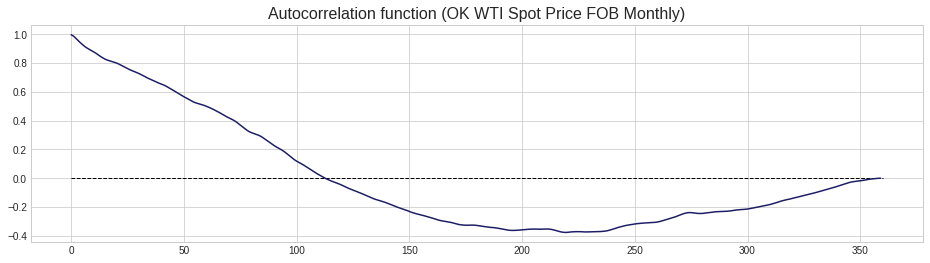

In [21]:
plt.figure(figsize=(16, 4))
plt.title('Autocorrelation function (OK WTI Spot Price FOB Monthly)', size=16)
plt.plot((0, train_month.shape[0]), (0, 0), color='black', linestyle='--', linewidth=1)
plt.plot(autocorr(train_month.value), color='#1D1D65')
plt.show()

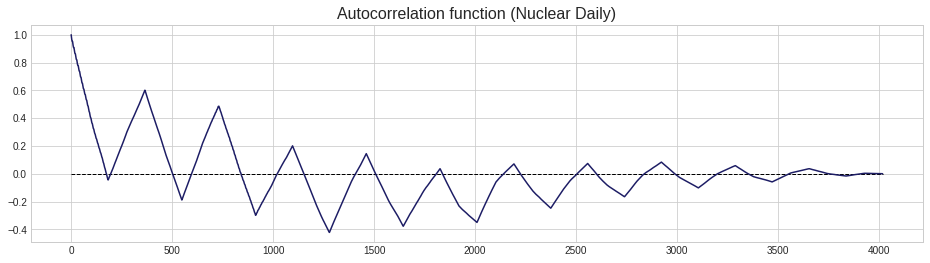

In [22]:
plt.figure(figsize=(16, 4))
plt.title('Autocorrelation function (Nuclear Daily)', size=16)
plt.plot((0, train_day.shape[0]), (0, 0), color='black', linestyle='--', linewidth=1)
plt.plot(autocorr(train_day.value), color='#1D1D65')
plt.show()

In [23]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

In [24]:
from mycolorpy import colorlist as mcp

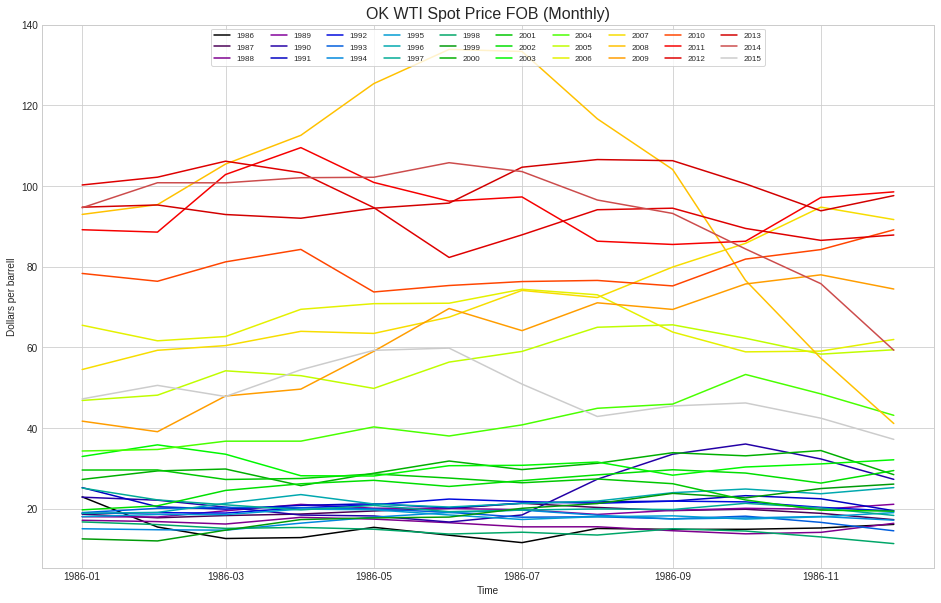

In [25]:
season = 12
n = train_month.shape[0] // season

palette=mcp.gen_color(cmap="nipy_spectral",n=n)
colors = [palette[i] for i in range(n)] 

plt.figure(figsize=(16, 10))
for i in range(n):
    plt.plot(train_month.time[:season], 
             train_month.value0[season * i: season * (i+1)], 
             c=colors[i], label=f"{1986+i}")
plt.title('OK WTI Spot Price FOB (Monthly)', size=16)
plt.ylabel('Dollars per barrell')
plt.xlabel('Time')
plt.legend(prop={'size': 8}, frameon=True, loc='upper center', ncol=10)
plt.show()

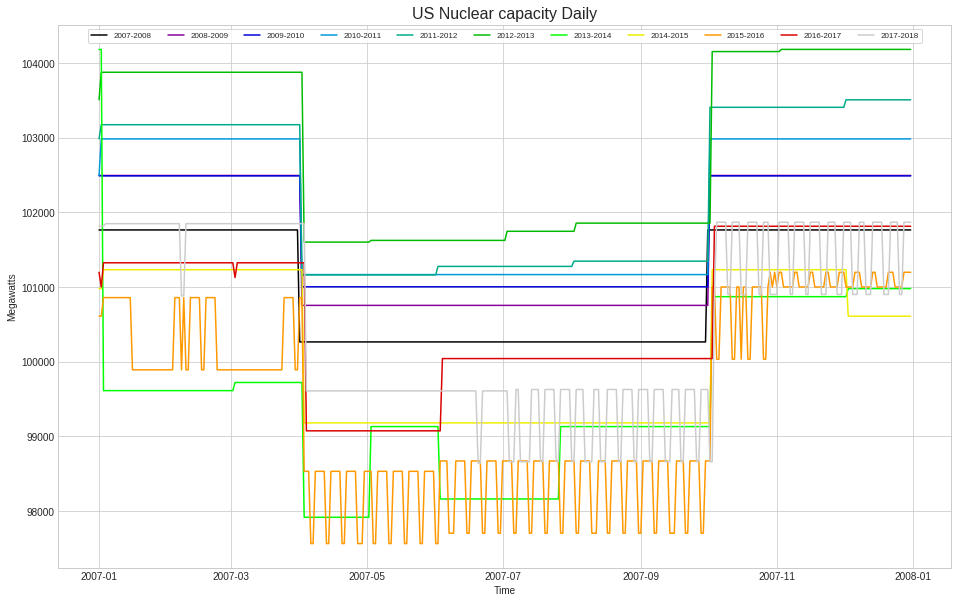

In [26]:
season = 365
n = train_day.shape[0] // season

palette=mcp.gen_color(cmap="nipy_spectral",n=n)
colors = [palette[i] for i in range(n)] 

plt.figure(figsize=(16, 10))
for i in range(n):
    plt.plot(train_day.time[:season], 
             train_day.value0[season * i: season * (i+1)], 
             c=colors[i], label=f"{2007 + i}-{2008 + i}")
plt.title('US Nuclear capacity Daily', size=16)
plt.ylabel('Megawatts')
plt.xlabel('Time')
plt.legend(prop={'size': 8}, frameon=True, loc='upper center', ncol=11)
plt.show()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

In [27]:
from sklearn.metrics import mean_absolute_error as mae

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [28]:
from sktime.forecasting.naive import NaiveForecaster

In [29]:
# Горизонт предсказания
fh = np.arange(1, test_month.shape[0]+1)

In [30]:
# Naive Forcaster -- last

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)

print('MAE for the simple Naive Forecaster =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

MAE for the simple Naive Forecaster = 0.501


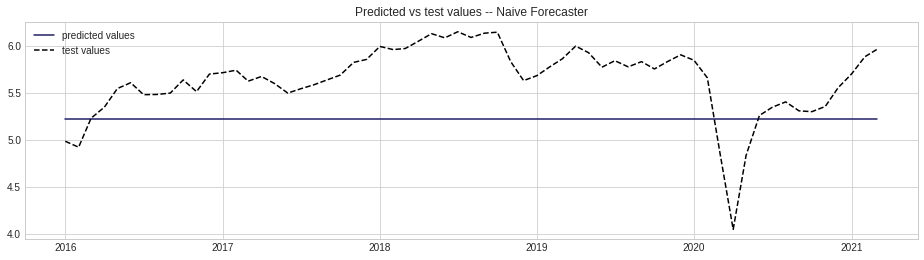

In [31]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster')
plt.legend()
plt.show()

Второй способ, если я  правильно поняла -- такая же стратегия (last, по последнему значению), но еще с учетом сезонности... I hope I'm right

In [32]:
# Naive Forcaster -- with seasonality

forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)

from sklearn.metrics import mean_absolute_error as mae
print('MAE for the Naive Forecaster with seasonality =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

MAE for the Naive Forecaster with seasonality = 0.331


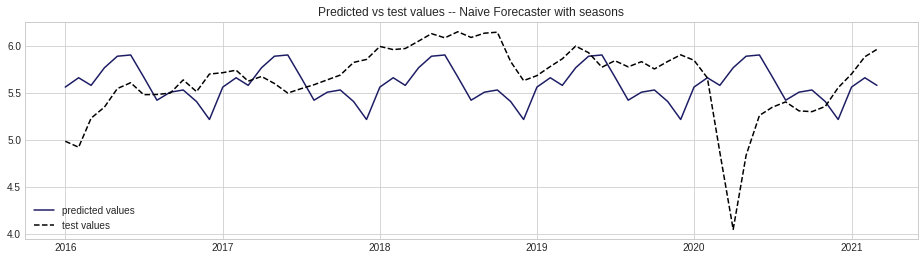

In [33]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster with seasons')
plt.legend()
plt.show()

Выглядит как то что нужно вроде

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [34]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [35]:
# ARIMA

forecaster = ARIMA(order=(1, 1, 1),seasonal_order=(1, 0, 0, 12), suppress_warnings=True)
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)
print('MAE for ARIMA =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

MAE for ARIMA = 0.547


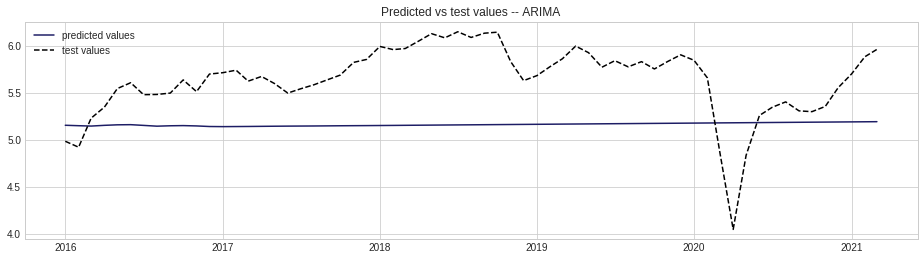

In [36]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- ARIMA')
plt.legend()
plt.show()

In [37]:
#AutoARIMA

forecaster = AutoARIMA(sp=12, d=0, max_p=5, max_q=5, suppress_warnings=True)
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)
print('MAE for AutoARIMA =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

MAE for AutoARIMA = 0.601


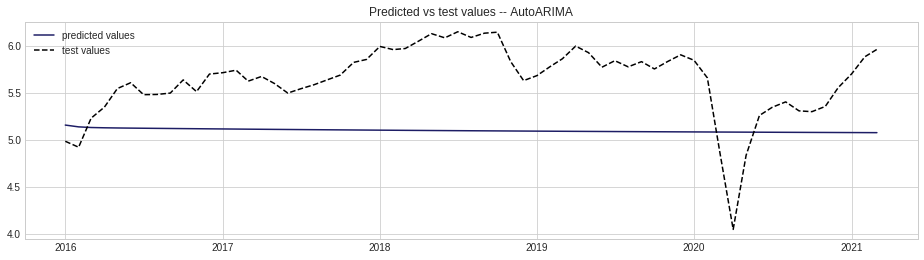

In [38]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- AutoARIMA')
plt.legend()
plt.show()

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [39]:
from orbit.models import LGT
from orbit.models import DLT
from orbit.diagnostics.plot import plot_predicted_data

In [40]:
# Local Global Trend (LGT)

lgt = LGT(
    response_col='value',
    date_col='time',
    seasonality=12,
    seed=999,
)

lgt.fit(df=train_month)
predicted_df = lgt.predict(df=test_month)

print('\nMAE for LGT =', 
      '{0:.3f}'.format(mae(test_month.value, predicted_df.prediction)))

To run all diagnostics call pystan.check_hmc_diagnostics(fit)



MAE for LGT = 0.388


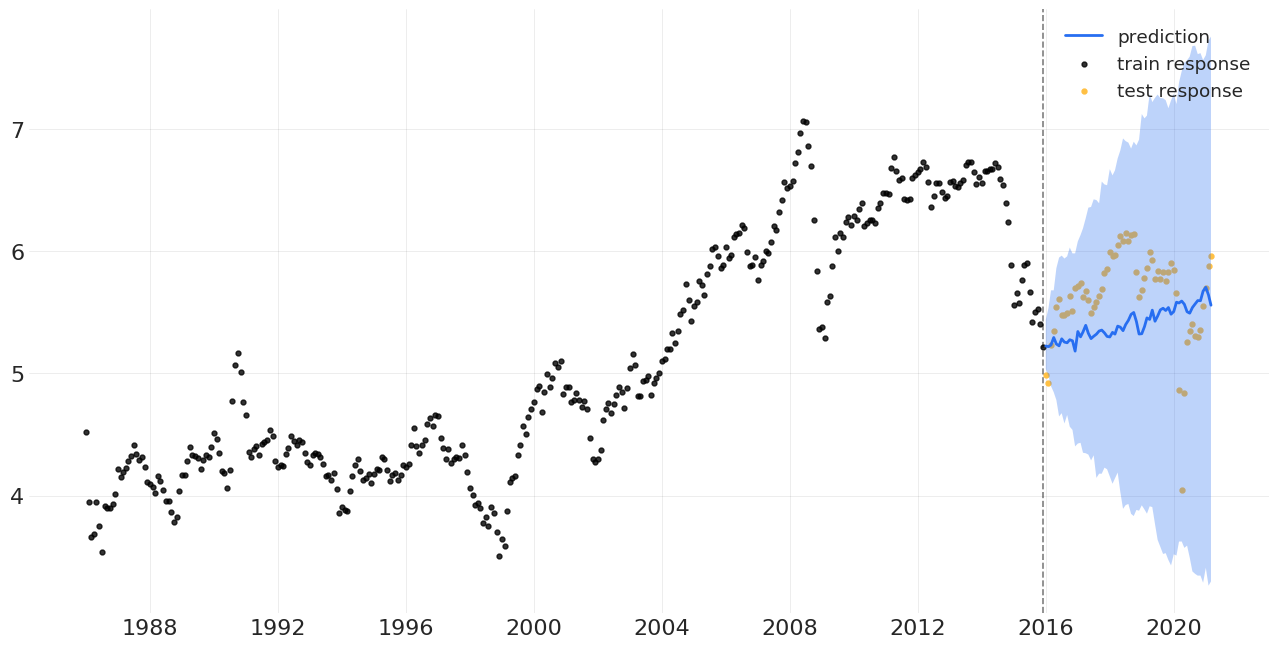

In [41]:
# LGT Viz

plot_predicted_data(
    training_actual_df=train_month, predicted_df=predicted_df,
    date_col=lgt.date_col, actual_col=lgt.response_col,
    test_actual_df=test_month
);

In [42]:
# Damped Local Trend (DLT)

dlt = DLT(
    response_col='value', 
    date_col='time',
    seasonality=12,
    seed=888,
)

dlt.fit(df=train_month)
predicted_df = dlt.predict(df=test_month)

print('\nMAE for DLT =', 
      '{0:.3f}'.format(mae(test_month.value, predicted_df.prediction)))

To run all diagnostics call pystan.check_hmc_diagnostics(fit)



MAE for DLT = 0.364


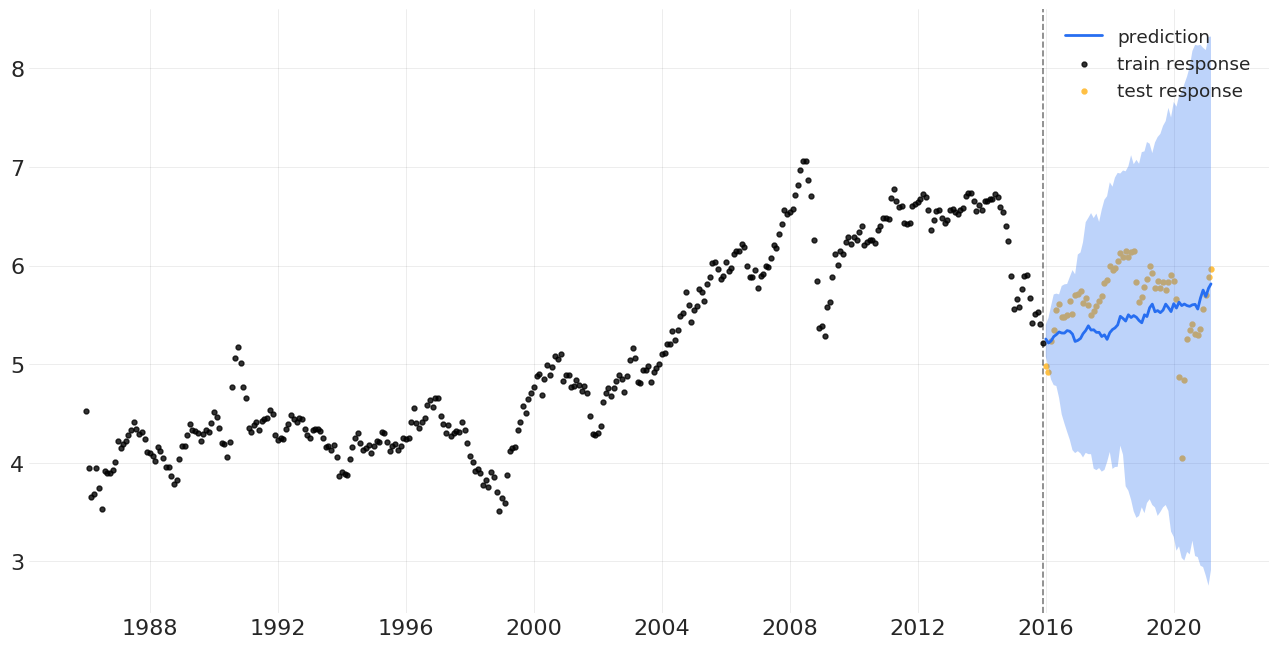

In [43]:
plot_predicted_data(
    training_actual_df=train_month, predicted_df=predicted_df,
    date_col=dlt.date_col, actual_col=dlt.response_col,
    test_actual_df=test_month
);

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [44]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

In [45]:
# ExpSmoothing

forecaster = ExponentialSmoothing(sp=12)
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)

print('MAE for ExponentialSmoothing =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

MAE for ExponentialSmoothing = 0.501


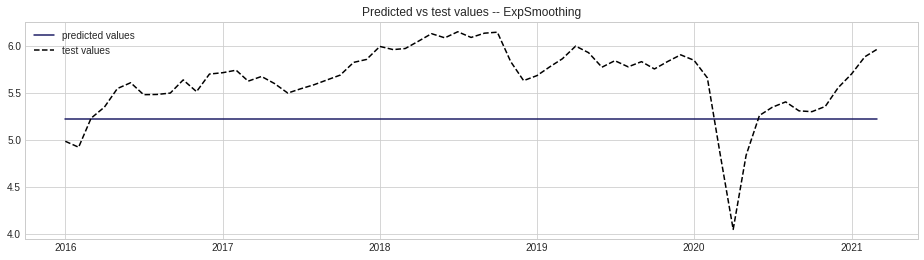

In [46]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- ExpSmoothing')
plt.legend()
plt.show()

In [47]:
# AutoETS

forecaster = AutoETS(trend='add', seasonal=True, sp=12, auto=True,)
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)

print('MAE for AutoETS =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

MAE for AutoETS = 0.735


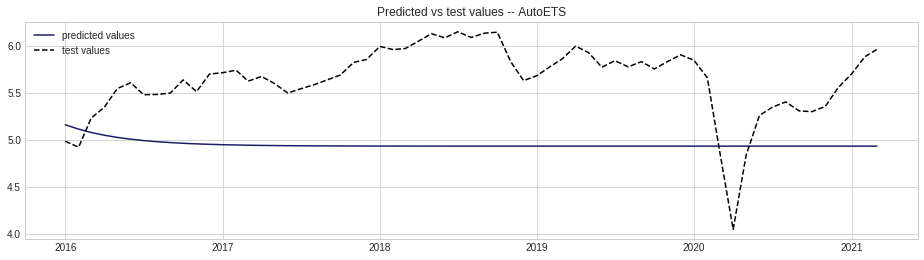

In [48]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- AutoETS')
plt.legend()
plt.show()

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [49]:
# нарисуйте пресказания

Лучшей моделью c точки зрения МАЕ оказалась сезонная Naive Forecaster. Отрисую предсказания еще раз:

MAE for the Naive Forecaster with seasonality = 0.331


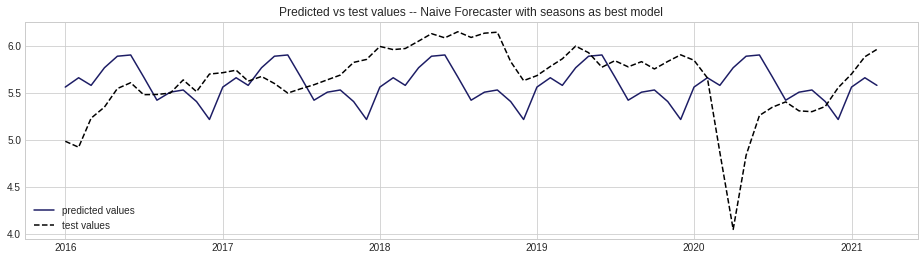

In [50]:
# Naive Forcaster -- with seasonality

forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(train_month.value)
y_pred = forecaster.predict(fh)

from sklearn.metrics import mean_absolute_error as mae
print('MAE for the Naive Forecaster with seasonality =', 
      '{0:.3f}'.format(mae(test_month.value, y_pred)))

plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster with seasons as best model')
plt.legend()
plt.show()

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [51]:
from sktime.forecasting.naive import NaiveForecaster

In [52]:
# Горизонт предсказания
fh = np.arange(1, test_day.shape[0]+1)

In [53]:
# Naive Forcaster -- last

forecaster = NaiveForecaster(strategy="last")
forecaster.fit(train_day.value)
y_pred = forecaster.predict(fh)

print('MAE for the simple Naive Forecaster =', 
      '{0:.3f}'.format(mae(test_day.value, y_pred)))

MAE for the simple Naive Forecaster = 0.035


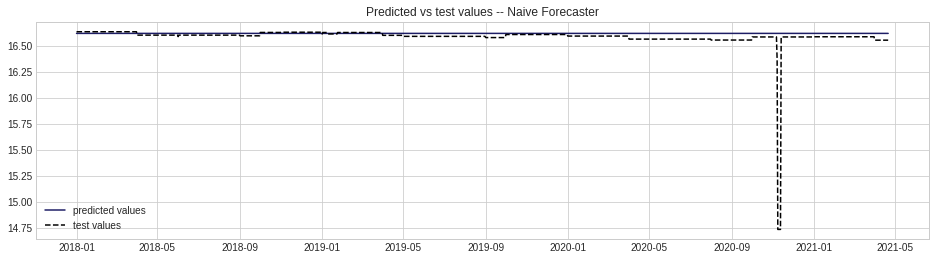

In [54]:
plt.figure(figsize=(16, 4))
plt.plot(test_day.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_day.time, test_day.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster')
plt.legend()
plt.show()

In [55]:
# Naive Forcaster -- with seasonality

forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(train_day.value)
y_pred = forecaster.predict(fh)

from sklearn.metrics import mean_absolute_error as mae
print('MAE for the Naive Forecaster with seasonality =', 
      '{0:.3f}'.format(mae(test_day.value, y_pred)))

MAE for the Naive Forecaster with seasonality = 0.041


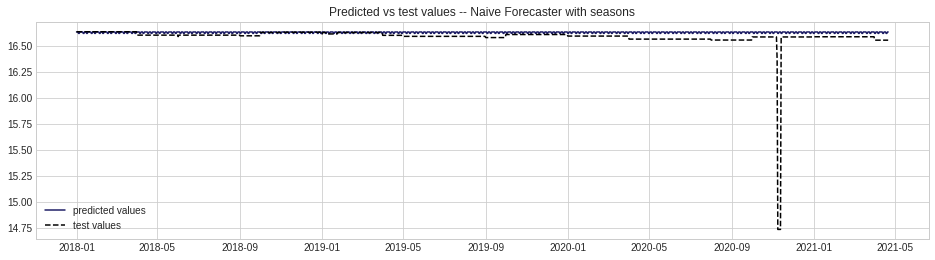

In [56]:
plt.figure(figsize=(16, 4))
plt.plot(test_day.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_day.time, test_day.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster with seasons')
plt.legend()
plt.show()

### KTR из orbit (1 балл).



In [57]:
from orbit.models import KTR

In [58]:
ktr = KTR(
    response_col='value',
    date_col='time',
    seed=888,
    estimator='pyro-svi',
)
ktr.fit(df=train_day)
predicted_df = ktr.predict(df=test_day)

print('\nMAE for KTR =', 
      '{0:.3f}'.format(mae(test_day.value, predicted_df.prediction)))

INFO:root:Guessed max_plate_nesting = 1



MAE for KTR = 0.037


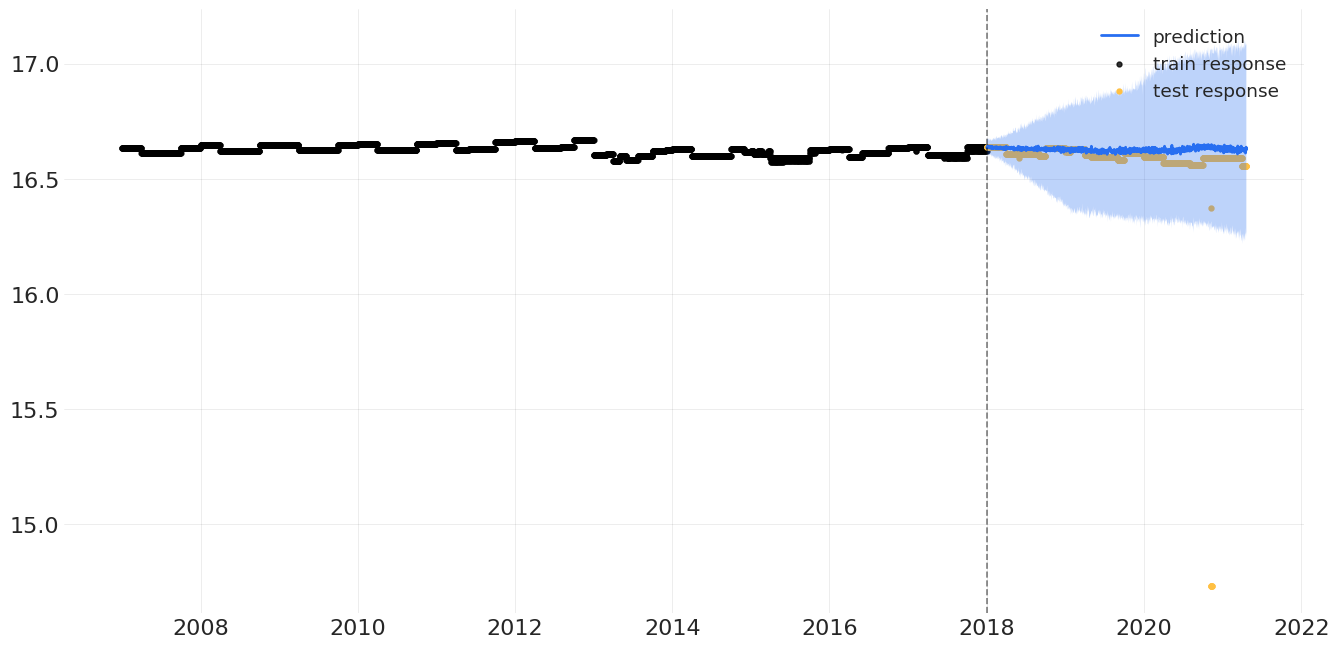

In [59]:
plot_predicted_data(
    training_actual_df=train_day, predicted_df=predicted_df,
    date_col=ktr.date_col, actual_col=ktr.response_col,
    test_actual_df=test_day
);

### Phophet (1 балл).



In [60]:
from prophet import Prophet

In [61]:
train_day.columns = ['ds', 'y0', 'y']
test_day.columns = ['ds', 'y0', 'y']

In [62]:
proph = Prophet(interval_width=0.9)
proph.fit(train_day)
predicted_df = proph.predict(test_day)

print('\nMAE for Phophet =', 
      '{0:.3f}'.format(mae(test_day.y, predicted_df.yhat)))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



MAE for Phophet = 0.033


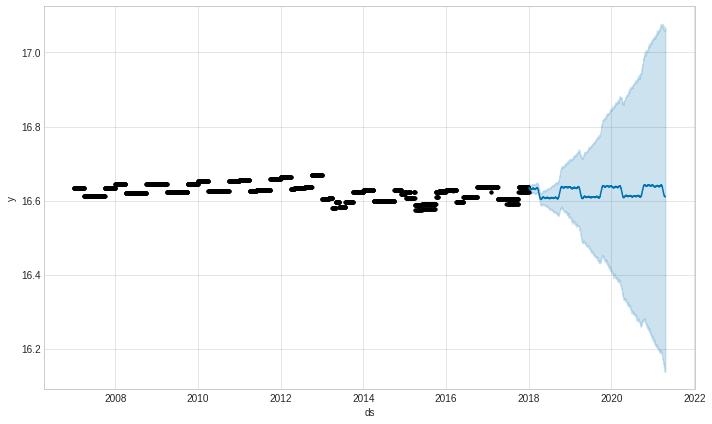

In [63]:
fig1 = proph.plot(predicted_df) # прогноз

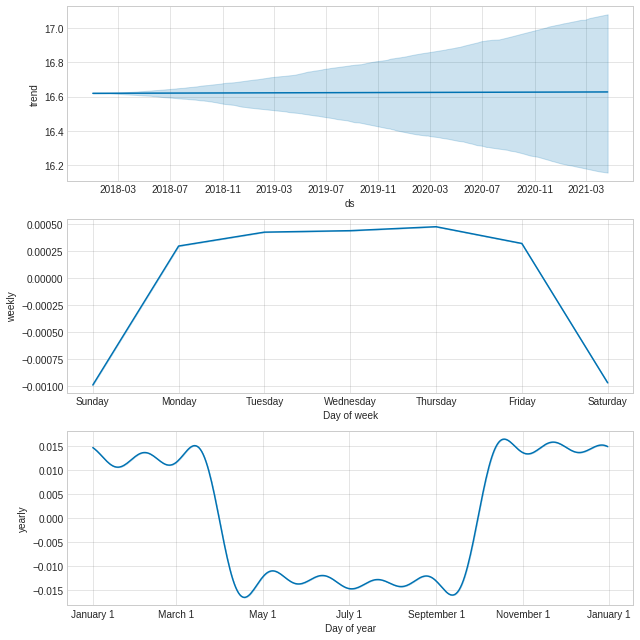

In [64]:
fig2 = proph.plot_components(predicted_df) # компоненты прогноза

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [65]:
# нарисуйте пресказания

Лучшая модель -- Prophet. Отрисовала чуть выше, но скопирую

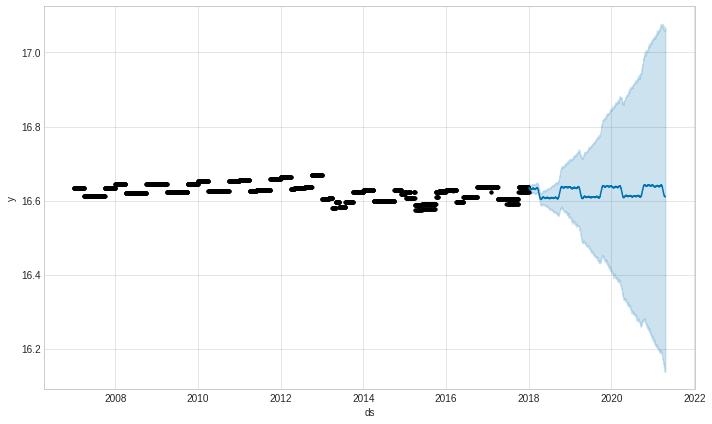

In [66]:
fig3 = proph.plot(predicted_df)

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?




Возьму ряд с месячной периодичностью. Поскольку в моих данных нет самостоятельных признаков, в качестве единственного признака я буду использовать даты, представленные в числовом виде.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
# Преобразую даты в числа очень стремным образом
train_df = train_month.copy()
train_df.time = pd.to_numeric(train_df.time)
test_df = test_month.copy()
test_df.time = pd.to_numeric(test_df.time)

In [69]:
# Отделяю признаки
X_train = np.array(train_df.time).reshape(-1, 1)
y_train = train_df.value
X_test = np.array(test_df.time).reshape(-1, 1)
y_test = test_df.value

In [70]:
# Нормирую стремные числовые представления дат
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
;

''

**1. Линейная регрессия**

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE for Linear Regression =', 
      '{0:.3f}'.format(mae(y_test, y_pred)))

MAE for Linear Regression = 1.166


In [73]:
model = Lasso()
model.fit(X_train, y_train)
y_pred_lasso = model.predict(X_test)
print('MAE for Lasso Linear Regression =', 
      '{0:.3f}'.format(mae(y_test, y_pred)))

MAE for Lasso Linear Regression = 1.166


In [74]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE for Ridge Linear Regression =', 
      '{0:.3f}'.format(mae(y_test, y_pred)))

MAE for Ridge Linear Regression = 1.161


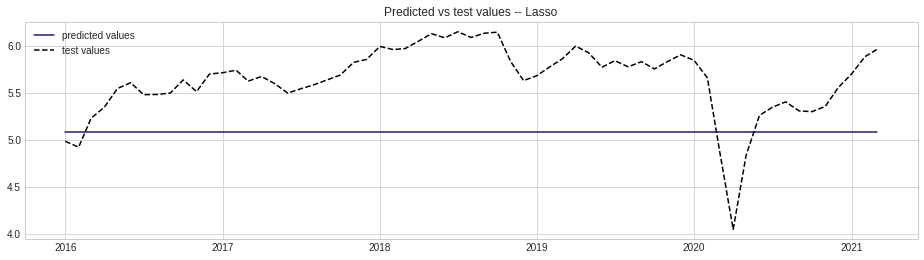

In [75]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred_lasso, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Lasso')
plt.legend()
plt.show()

**2. KNN**

In [76]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('MAE for KNN Regressor =', 
      '{0:.3f}'.format(mae(y_test, y_pred)))

MAE for KNN Regressor = 0.276


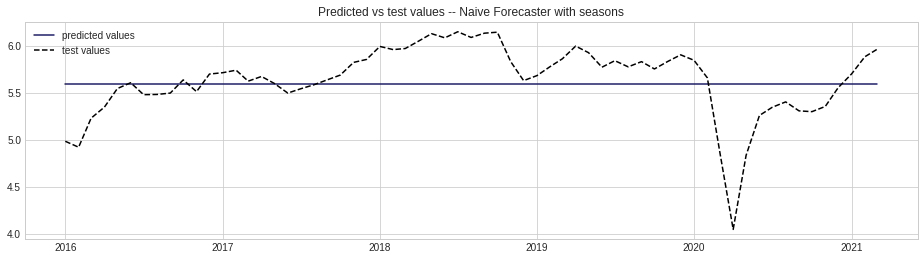

In [78]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster with seasons')
plt.legend()
plt.show()

**3. Решающее дерево**

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE for Decision Tree Regressor =', 
      '{0:.3f}'.format(mae(y_test, y_pred)))

MAE for Decision Tree Regressor = 0.501


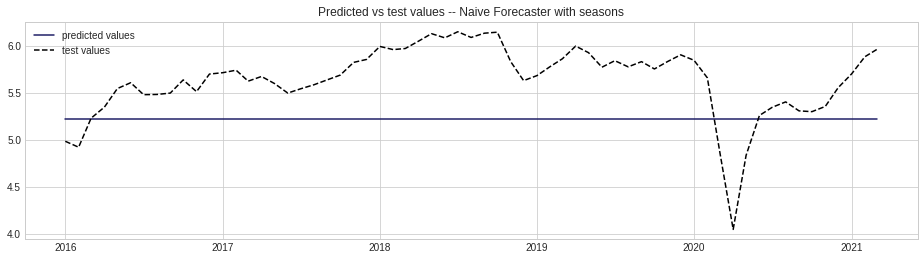

In [81]:
# Viz
plt.figure(figsize=(16, 4))
plt.plot(test_month.time, y_pred, label='predicted values', color='#1D1D65')
plt.plot(test_month.time, test_month.value, label='test values',  color='black', linestyle='--')
plt.title('Predicted vs test values -- Naive Forecaster with seasons')
plt.legend()
plt.show()

Во-первых, почти все модели дали константные прогнозы. Во-вторых, лучше всела справилась модель knn  с числом соседей = 10. Причем MAE для этой модели ниже (лучше), чем для моделей предсказания временных рядов для данных с месячной периодичностью (всех, которые были выше).

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [82]:
# ваш код модели на STAN и её обучения здесь

In [83]:
# посчитайте метрики на test

In [84]:
# нарисуйте предсказания